In [30]:
from procoli import lkl_prof
import matplotlib.pyplot as plt
import numpy as np
from getdist import mcsamples, plots, chains
from glob import glob

%matplotlib inline

from matplotlib.lines import Line2D

## Grab chains 

In [31]:
settings = {'ignore_rows' : 0.5} #, 'smooth_scale_1D' : 0.3, 'smooth_scale_2D' : 0.4}

In [32]:
chain_root = '2025-02-03_10000000_'
chain_files = glob('/*10000*.txt')

w0wa_chains = mcsamples.loadMCSamples(chain_root, settings =settings)
w0wa_chains.readChains(chain_files)

/Users/tz/PycharmProjects/desisnia/desinia_/cosmosis-main/examples/desisnia_tz/tz_w0wa_profile_minimal2/2025-02-03_10000000__6.txt
/Users/tz/PycharmProjects/desisnia/desinia_/cosmosis-main/examples/desisnia_tz/tz_w0wa_profile_minimal2/2025-02-03_10000000__5.txt
/Users/tz/PycharmProjects/desisnia/desinia_/cosmosis-main/examples/desisnia_tz/tz_w0wa_profile_minimal2/2025-02-03_10000000__4.txt
/Users/tz/PycharmProjects/desisnia/desinia_/cosmosis-main/examples/desisnia_tz/tz_w0wa_profile_minimal2/2025-02-03_10000000__1.txt
/Users/tz/PycharmProjects/desisnia/desinia_/cosmosis-main/examples/desisnia_tz/tz_w0wa_profile_minimal2/2025-02-03_10000000__3.txt
/Users/tz/PycharmProjects/desisnia/desinia_/cosmosis-main/examples/desisnia_tz/tz_w0wa_profile_minimal2/2025-02-03_10000000__2.txt
Removed 0.5 as burn in


In [33]:
print('--------------------------------- Chain information ---------------------------------')
print("w0wa ---- R-1 = {:.4f}".format(w0wa_chains.getGelmanRubin()))

--------------------------------- Chain information ---------------------------------
w0wa ---- R-1 = 0.0090


In [34]:
w0wa_chains.getParamNames().list()

['Omega_m', 'H0', 'w0_fld', 'wa_fld', 'Omega0_fld']

In [35]:
w0wa_chains.setRanges({'wa_fld': [-3,2], 'w0_fld': [-3,1]})

In [36]:
params_to_plot = w0wa_chains.getParamNames().list()

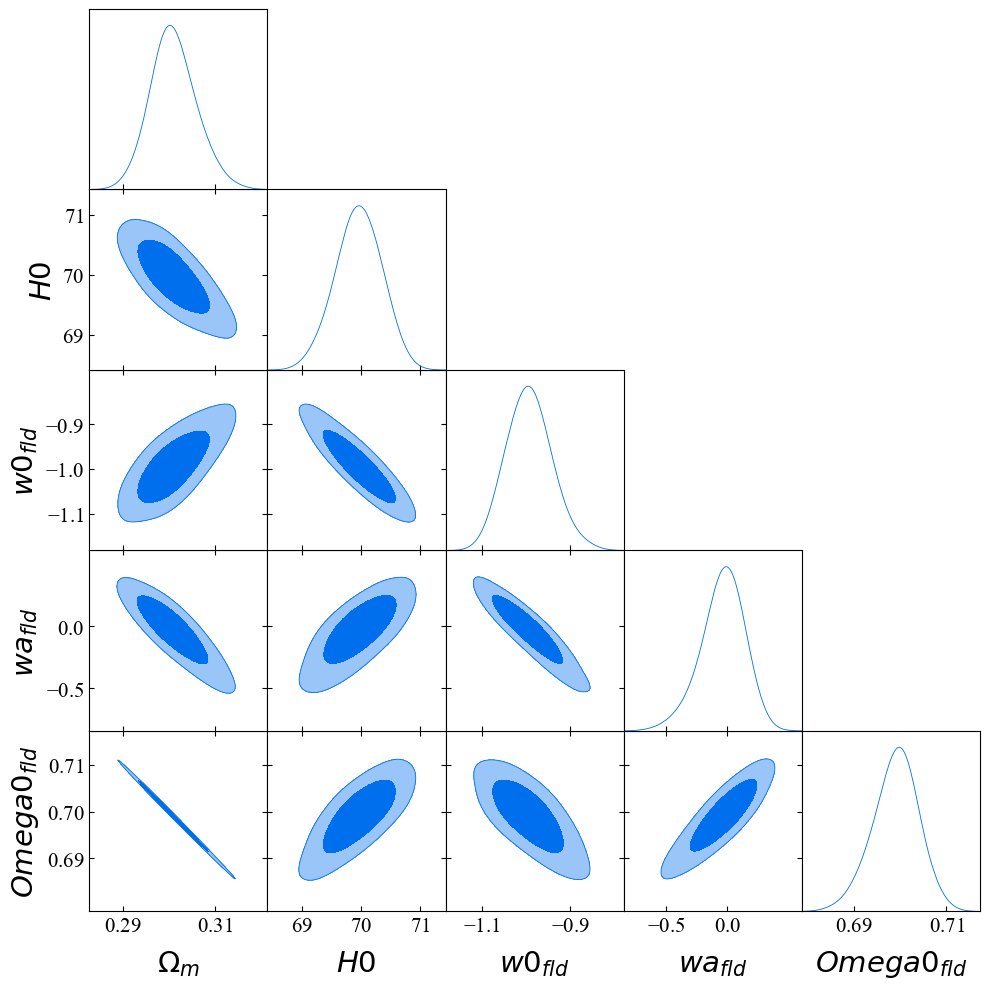

In [37]:
tri = plots.getSubplotPlotter() # set this to an instance of the subplotter
tri.new_plot() # clears the instance so you can start on a new plot.
tri.settings.figure_legend_frame = False # remove legend frame
tri.settings.alpha_factor_contour_lines = 1

# Many params 
tri.settings.legend_fontsize = 24 
tri.settings.axes_fontsize = 18 
tri.settings.lab_fontsize = 24 
tri.settings.title_limit_fontsize = 16

tri.triangle_plot(
    w0wa_chains,
    # contour_colors = colours,
    # legend_labels = cosmos_labels,
    params = params_to_plot,
    # legend_loc='upper right',
    # filled=fills,
    # contour_args=[{'alpha':alpha} for i in range(len(cosmos_to_plot))],
    # contour_ls=linestyles,
    # contour_args=[{'alpha':a} for a in alphas],
    # markers=markers,
    filled = True, 
    # title_limit=1,
)

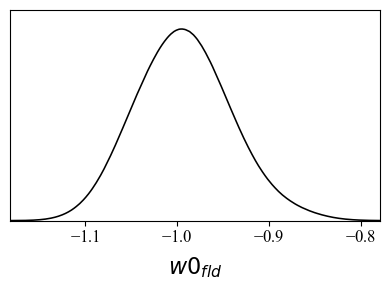

In [38]:
oneD = plots.get_single_plotter(width_inch=4)
oneD.settings.figure_legend_frame = False # remove legend frame
# Many params 
oneD.settings.axes_fontsize = 12
oneD.settings.lab_fontsize = 16

oneD.plot_1d(w0wa_chains, 'w0_fld')

### Grab profiles 

#### Profile location

In [39]:
profile = lkl_prof(
  chains_dir='/Users/tz/PycharmProjects/desisnia/desinia_/cosmosis-main/examples/desisnia_tz/tz_w0wa_profile_minimal2/',
  prof_param='w0_fld', 
)
w0_prof = profile.full_lkl_prof_dict()

In [40]:
profile = lkl_prof(
  chains_dir='/Users/tz/PycharmProjects/desisnia/desinia_/cosmosis-main/examples/desisnia_tz/tz_w0wa_profile_minimal2/',
  prof_param='wa_fld', 
)
wa_prof = profile.full_lkl_prof_dict()

In [41]:
profile = lkl_prof(
  chains_dir='/Users/tz/PycharmProjects/desisnia/desinia_/cosmosis-main/examples/desisnia_tz/tz_w0wa_profile_minimal2/',
  prof_param='Omega_m', 
)
Omm_prof = profile.full_lkl_prof_dict()

In [42]:
profile = lkl_prof(
  chains_dir='/Users/tz/PycharmProjects/desisnia/desinia_/cosmosis-main/examples/desisnia_tz/tz_w0wa_profile_minimal2/',
  prof_param='H0', 
)
h_prof = profile.full_lkl_prof_dict()

In [43]:
def plot_prof_and_params(prof_lkl, prof_param=None, prof_param_label=None, params_to_plot=[], param_labels=[]):
    # Set the desired plotting style
    plt.rc('font', family='serif', serif='Times New Roman')
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 18

    fig, ax = plt.subplots(
        len(params_to_plot) + 1, 1,
        figsize=(6, 4 + 2 * len(params_to_plot)),
        gridspec_kw={'height_ratios': [2] + len(params_to_plot) * [1]}
    )

    ax[0].plot(
        prof_lkl[prof_param],
        prof_lkl['Total'] - min(prof_lkl['Total']),
        label=fr"{prof_param_label} profile",
        linestyle='-', linewidth=2.8
    )
    ax[0].set_ylabel(r'$\Delta\chi^2$', fontsize=18)
    ax[0].set_xticks([])
    ax[0].grid(False)

    for i in range(len(params_to_plot)):
        ax[i + 1].plot(
            prof_lkl[prof_param],
            prof_lkl[params_to_plot[i]],
            color='red', linestyle='--', linewidth=2.0  # Other curves style
        )
        ax[i + 1].set_ylabel(param_labels[i], fontsize=18)
        ax[i + 1].set_xticks([])
        ax[i + 1].grid(False)

    ax[len(params_to_plot)].set_xlabel(prof_param_label, fontsize=14)
    ax[len(params_to_plot)].grid(False)

    fig.subplots_adjust(hspace=0)
    fig.legend(frameon=False, ncols=2, loc='upper center', bbox_to_anchor=(0.5, 0.95))

In [44]:
def plot_prof_and_post(mcmc_chains, prof_lkl, prof_param, param_label, return_fig=False):
    # Set the desired plotting style
    plt.rc('font', family='serif', serif='Times New Roman')
    plt.rcParams['axes.labelsize'] = 22  # axis labels
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20

    oneD = plots.get_single_plotter()
    oneD.settings.figure_legend_frame = False
    oneD.settings.axes_fontsize = 22
    oneD.settings.lab_fontsize = 22

    # Plot the Bayesian MCMC 1D posterior
    oneD.plot_1d(mcmc_chains, prof_param, colors=['dodgerblue'], lw=2)

    # Plot the profile likelihood (convert -2*logL to likelihood)
    prof_plot_line, = plt.plot(
        prof_lkl[prof_param],
        np.exp(-prof_lkl['Total'] / 2),
        color='red',
        lw=2,
        linestyle='--'
    )

    # Prepare legend entries for Bayesian and profile likelihood curves
    bayes_line = Line2D([0], [0], color='dodgerblue', lw=2)
    prof_line  = Line2D([0], [0], color=prof_plot_line.get_color(), lw=2, linestyle='--')

    # Determine the true value based on the prof_param
    true_val = None
    if prof_param in ['Omega_m', 'omega_m']:
        true_val = 0.3
    elif prof_param in ['H0', 'h']:
        true_val = 70
    elif prof_param in ['w0_fld', 'w0']:
        true_val = -1.0
    elif prof_param in ['wa_fld', 'wa']:
        true_val = 0

    # If a true value was determined, add a vertical line and update the legend
    if true_val is not None:
        plt.axvline(x=true_val, color='black', linestyle=':', lw=2, label='True value')
        true_line = Line2D([0], [0], color='black', lw=2, linestyle=':')
        plt.legend([bayes_line, prof_line, true_line],
                   ['Bayesian \nMCMC', 'Profile \nlikelihood', 'True value'],
                   frameon=False,
                   fontsize=14)
    else:
        plt.legend([bayes_line, prof_line],
                   ['Bayesian \nMCMC', 'Profile \nlikelihood'],
                   frameon=False,
                   fontsize=14)

    plt.xlabel(param_label, fontsize=18)
    plt.grid(False)
    save_filename = f'./{prof_param}_prof.png'
    plt.savefig(save_filename, dpi=600, bbox_inches='tight')


    if return_fig:
        return plt.gcf()

### $w_0$ profiles

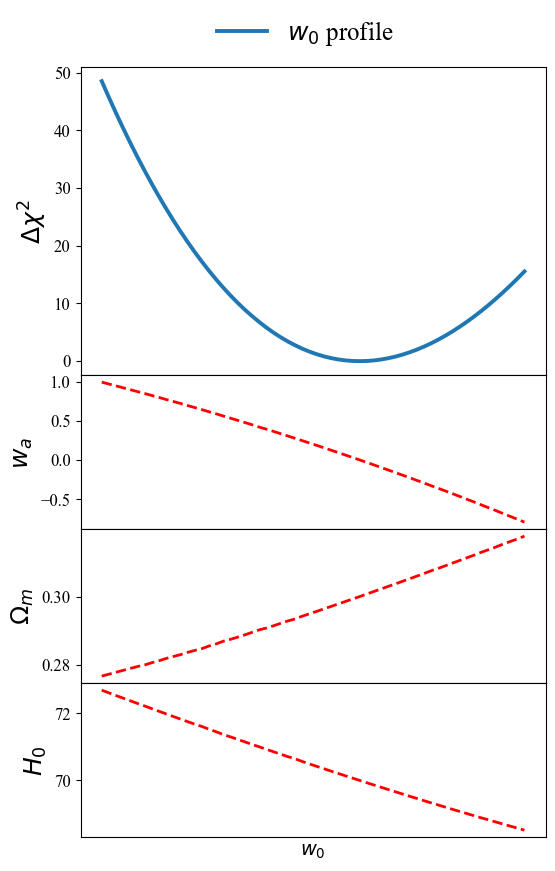

In [45]:
prof_param = 'w0_fld'
prof_param_label = r'$w_0$'
params_to_plot = ['wa_fld', 'Omega_m', 'H0',]
param_labels = [r'$w_a$', r'$\Omega_m$', r'$H_0$',]

plot_prof_and_params(w0_prof, prof_param, prof_param_label, params_to_plot, param_labels)


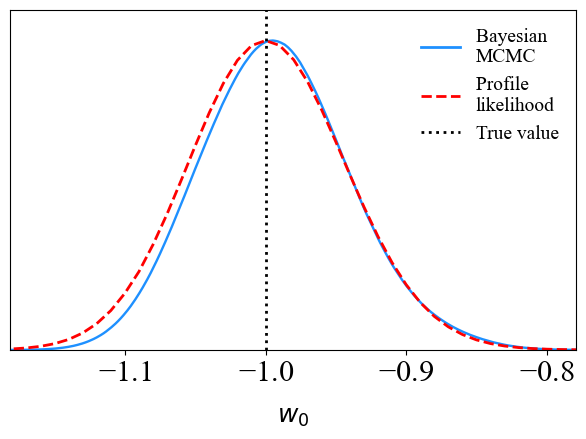

In [46]:
w0_plot = plot_prof_and_post(mcmc_chains=w0wa_chains, prof_lkl=w0_prof, prof_param=prof_param, param_label=prof_param_label, return_fig=True)

### $w_a$ profiles

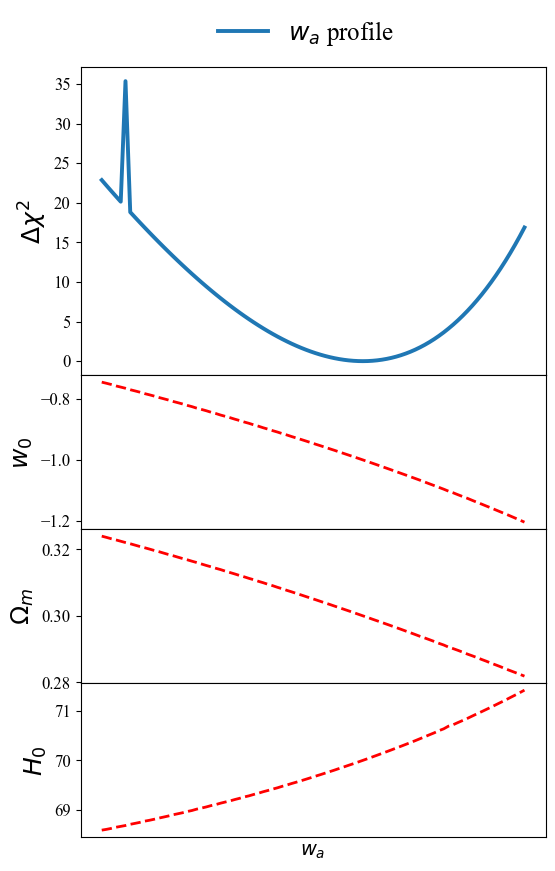

In [47]:
prof_param = 'wa_fld'
prof_param_label = r'$w_a$'
params_to_plot = ['w0_fld', 'Omega_m', 'H0',]
param_labels = [r'$w_0$', r'$\Omega_m$', r'$H_0$',]

plot_prof_and_params(prof_lkl=wa_prof, prof_param=prof_param, prof_param_label=prof_param_label, params_to_plot=params_to_plot, param_labels=param_labels,)

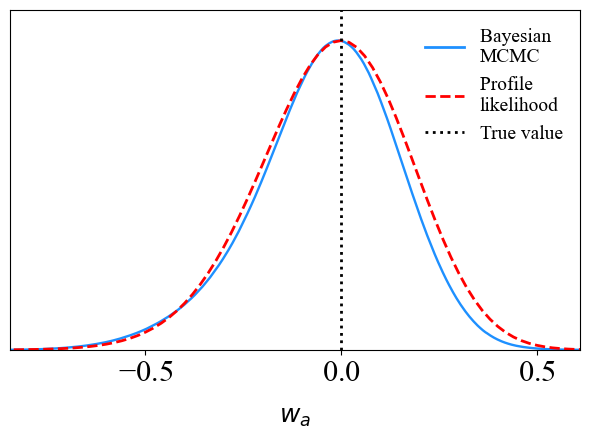

In [48]:
wa_plot = plot_prof_and_post(mcmc_chains=w0wa_chains, prof_lkl=wa_prof, prof_param=prof_param, param_label=prof_param_label, return_fig=True)

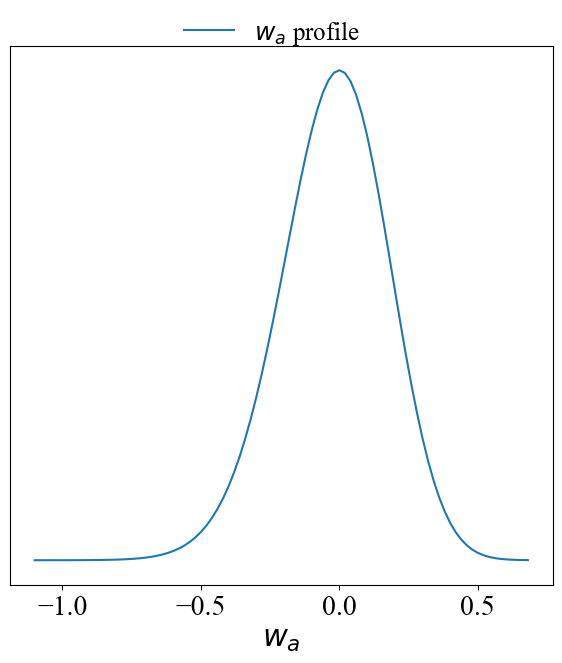

In [49]:
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.plot(wa_prof['wa_fld'], 
        np.exp( -wa_prof['Total']/2),
       label = r'$w_a$ profile')

ax.set_xlabel(r'$w_a$')
ax.get_yaxis().set_visible(False)
ax.set_ylabel(r'$\mathcal{L}$')


fig.legend(frameon=False, ncols=2, loc='upper center', bbox_to_anchor=(0.5,0.95))

### $\Omega_m$ profiles

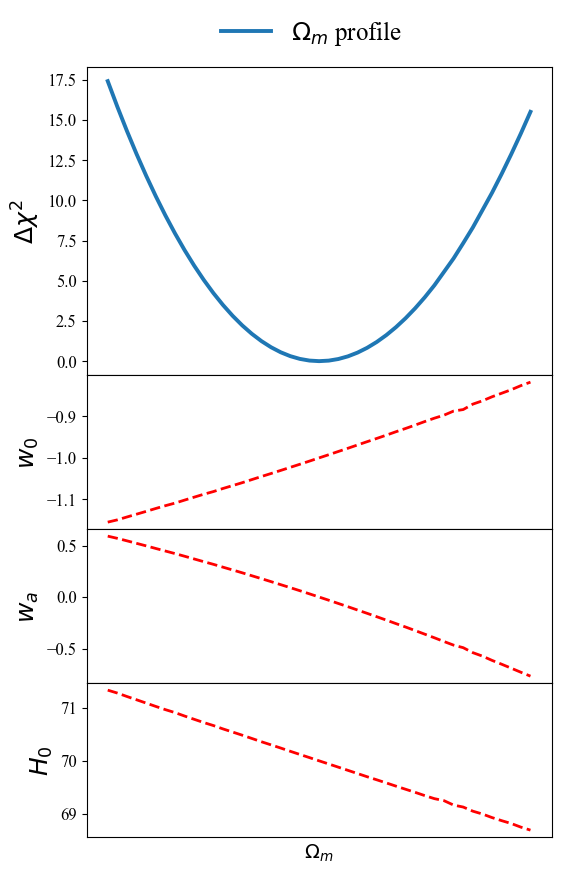

In [50]:
prof_param = 'Omega_m'
prof_param_label = r'$\Omega_m$'
params_to_plot = ['w0_fld', 'wa_fld', 'H0',]
param_labels = [r'$w_0$', r'$w_a$', r'$H_0$',]

plot_prof_and_params(prof_lkl=Omm_prof, prof_param=prof_param, prof_param_label=prof_param_label, params_to_plot=params_to_plot, param_labels=param_labels,)

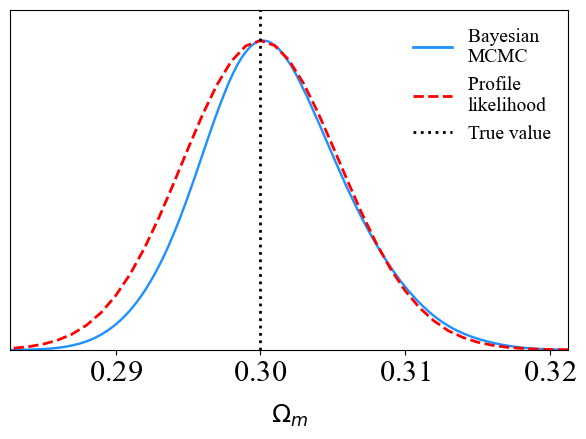

In [51]:
om_plot = plot_prof_and_post(mcmc_chains=w0wa_chains, prof_lkl=Omm_prof, prof_param=prof_param, param_label=prof_param_label, return_fig=True)

### $H_0$ profiles

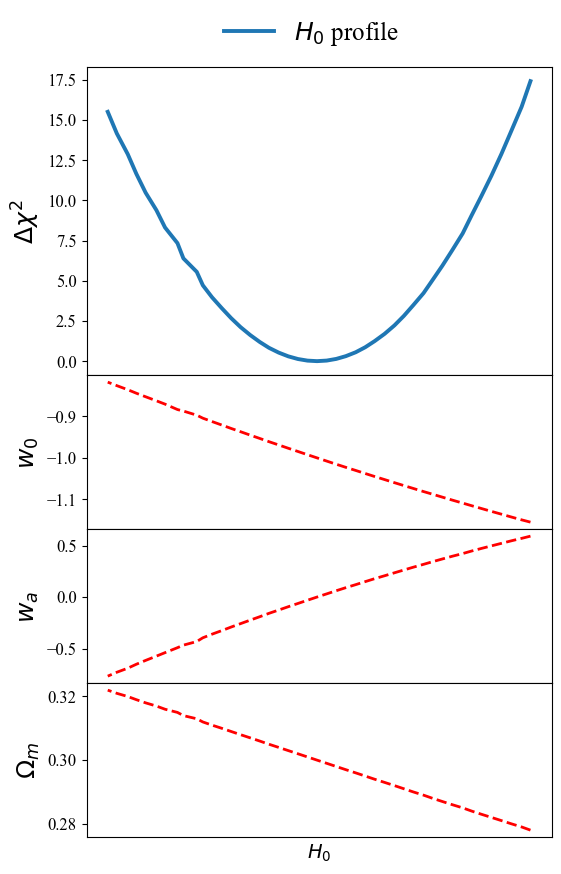

In [52]:
prof_param = 'H0'
prof_param_label = r'$H_0$'
params_to_plot = ['w0_fld', 'wa_fld', 'Omega_m',]
param_labels = [r'$w_0$', r'$w_a$', r'$\Omega_m$',]

plot_prof_and_params(prof_lkl=Omm_prof, prof_param=prof_param, prof_param_label=prof_param_label, params_to_plot=params_to_plot, param_labels=param_labels,)

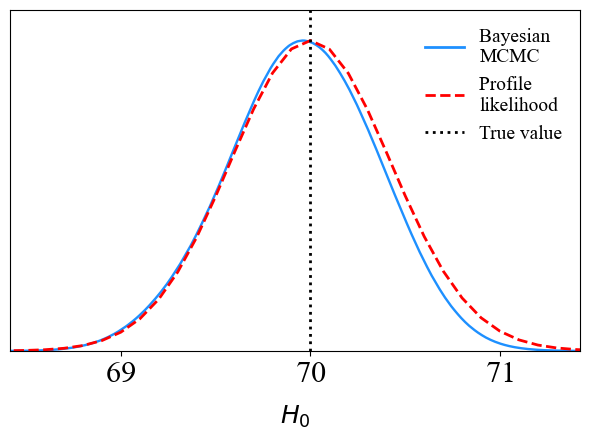

In [53]:
h0_plot = plot_prof_and_post(mcmc_chains=w0wa_chains, prof_lkl=h_prof, prof_param=prof_param, param_label=prof_param_label, return_fig=True)

In [60]:
import matplotlib.pyplot as plt
from PIL import Image

png_files = ['w0_fld_prof.png', 'wa_fld_prof.png', 'H0_prof.png', 'Omega_m_prof.png']

images = [Image.open(png_file) for png_file in png_files]

fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=800)

for ax, img in zip(axs.flatten(), images):
    ax.imshow(img, interpolation='none')  #  interpolation='nearest'
    ax.axis("off")

plt.tight_layout()


output_filename = 'combined_images.png'
plt.savefig(output_filename, dpi=600, bbox_inches='tight')
plt.show()
